In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [47]:
file_path = "/Users/adityajyoti/Documents/BPTS/Congestion Data/co-lab-repo/road_width_BTP (2).xlsx"  # Update the path if needed
df = pd.read_excel(file_path, sheet_name="Sheet1")

In [54]:
# Ensure 'Road_Width' is numeric
df['Road Width (m)'] = pd.to_numeric(df['Road Width (m)'], errors='coerce')


In [55]:
df = df.dropna(subset=['Road Width (m)'])

In [56]:
print("Initial Data:")
print(df.head())


Initial Data:
   Index            Plaza Name            Sate           City  \
0      1  11 miles Toll\nPlaza  Madhya Pradesh         Bhopal   
1      2  18th Mile Toll Plaza     West Bengal        Farakka   
2      3       6 ML Toll Plaza       Rajasthan  Hanumanga\nrh   
3      4      Aaini Toll Plaza   Uttar Pradesh       Bahraich   
4      5    Aaspur Toll\nPlaza   Uttar Pradesh           Etah   

                            Geo Codes  Longitude  Latitudes  \
0               23.1415030,77.4854990  23.141503  77.485499   
1  24.82246724101024,87.9669623136514  24.822467  87.966962   
2               29.5198926,74.3359579  29.519893  74.335958   
3              27.2970385,81.54163697  27.297038  81.541637   
4                   27.48692,78.79217  27.486920  78.792170   

  Road Width (pixels)  Road Width (m)  
0                 652           40.18  
1                 713           44.49  
2                 718           44.84  
3                 803           50.85  
4               

In [74]:
X = df[['Road Width (m)']]

In [73]:
y = 500 / (df['Road Width (m)'] + 5)

In [75]:
df['Congestion_Level'] = y 

In [76]:
def categorize_congestion(value):
    if value > 50:
        return "High Congestion"
    elif 20 <= value <= 50:
        return "Medium Congestion"
    else:
        return "Low Congestion"

df['Congestion_Category'] = df['Congestion_Level'].apply(categorize_congestion)

In [77]:
new_file_path = 'road_width_congestion.xlsx'
df.to_excel(new_file_path, index=False)

In [60]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [71]:
new_file_path = 'road_width_congestion.xlsx'
df.to_excel(new_file_path, index=False)

In [61]:
# Train Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [62]:
# Predict on test data
y_pred = model.predict(X_test)

In [63]:
# Model evaluation
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R-squared Score:", r2_score(y_test, y_pred))


Mean Absolute Error: 0.2199068532320448
Mean Squared Error: 0.09916474008214625
R-squared Score: 0.8877352018082878


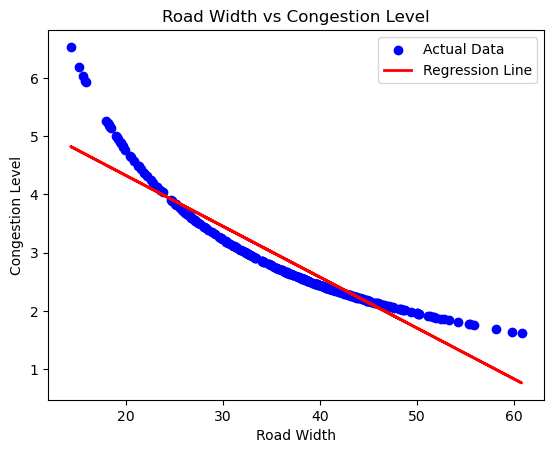

In [64]:
# Plot results
plt.scatter(X_test, y_test, color='blue', label='Actual Data')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression Line')
plt.xlabel('Road Width')
plt.ylabel('Congestion Level')
plt.title('Road Width vs Congestion Level')
plt.legend()
plt.show()

In [65]:
def predict_congestion(road_width):
    if road_width < 5:
        return "High Congestion"
    elif 5 <= road_width < 10:
        return "Medium Congestion"
    else:
        return "Low Congestion"

In [32]:
print(df_cleaned.head())
print(df_cleaned.dtypes)
print(df_cleaned.isnull().sum())


   Road_Width_m  Congestion
0         40.18      1074.0
Road_Width_m    float64
Congestion      float64
dtype: object
Road_Width_m    0
Congestion      0
dtype: int64


In [68]:

road_width_example = 50

print(f"Predicted Congestion Level for road width {road_width_example}: {predict_congestion(road_width_example)}")

Predicted Congestion Level for road width 50: Low Congestion


In [78]:
import pandas as pd
import os
from geopy.distance import great_circle

# Folder where weather data is already extracted
extract_folder = '/Users/adityajyoti/Documents/BPTS/Congestion Data/co-lab-repo/weather_data '

# Read all CSV files from extracted folder
weather_files = [os.path.join(extract_folder, f) for f in os.listdir(extract_folder) if f.endswith('.csv')]

# Merge all weather data files
weather_df_list = [pd.read_csv(f) for f in weather_files]
merged_weather_df = pd.concat(weather_df_list, ignore_index=True)

# Load other datasets
road_width_df = pd.read_excel('/Users/adityajyoti/Documents/BPTS/Congestion Data/co-lab-repo/road_width_BTP (2).xlsx')
night_light_df = pd.read_csv('/Users/adityajyoti/Documents/BPTS/Congestion Data/co-lab-repo/Night_Light_Data - Night_Light_Data2.csv')

# Merge Road Width with Weather Data using 'City'
merged_df = road_width_df.merge(merged_weather_df, on='City', how='left')

# Function to find nearest night light data point
def find_nearest_night_light(lat, lon, night_df):
    min_distance = float('inf')
    nearest_row = None
    
    for _, row in night_df.iterrows():
        night_lat, night_lon = row['Latitudes'], row['Longitude']
        distance = great_circle((lat, lon), (night_lat, night_lon)).km
        
        if distance < min_distance:
            min_distance = distance
            nearest_row = row
    
    return nearest_row

# Apply nearest match for Night Light Data
night_light_matched = road_width_df.apply(lambda row: find_nearest_night_light(row['Latitudes'], row['Longitude'], night_light_df), axis=1)

# Convert list of Series to DataFrame
night_light_matched_df = pd.DataFrame(list(night_light_matched))

# Merge the matched night light data with the main DataFrame
final_df = pd.concat([merged_df, night_light_matched_df], axis=1)

# Save the merged dataset
final_df.to_csv('merged_road_weather_nightlight.csv', index=False)

print("Merging Complete. File saved as 'merged_road_weather_nightlight.csv'")


/var/folders/l9/c09jqqjj3r1fy6tdds73csxh0000gn/T/ipykernel_32133/177912634.py:13: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  merged_weather_df = pd.concat(weather_df_list, ignore_index=True)


KeyError: 'City'

In [80]:
import pandas as pd
import os
from geopy.distance import great_circle

# Folder where weather data is already extracted
extract_folder = '/Users/adityajyoti/Documents/BPTS/Congestion Data/co-lab-repo/weather_data '

# Read all CSV files from extracted folder
weather_files = [os.path.join(extract_folder, f) for f in os.listdir(extract_folder) if f.endswith('.csv')]

# Merge all weather data files
weather_df_list = [pd.read_csv(f) for f in weather_files]
merged_weather_df = pd.concat(weather_df_list, ignore_index=True)

# Load other datasets
road_width_df = pd.read_excel('/Users/adityajyoti/Documents/BPTS/Congestion Data/co-lab-repo/road_width_BTP (2).xlsx')
night_light_df = pd.read_csv('/Users/adityajyoti/Documents/BPTS/Congestion Data/co-lab-repo/Night_Light_Data - Night_Light_Data2.csv')

# Standardize column names (strip spaces, convert to lowercase)
road_width_df.columns = road_width_df.columns.str.strip().str.lower()
merged_weather_df.columns = merged_weather_df.columns.str.strip().str.lower()
night_light_df.columns = night_light_df.columns.str.strip().str.lower()

# Merge Road Width with Weather Data using 'city'
if 'city' in road_width_df.columns and 'city' in merged_weather_df.columns:
    merged_df = road_width_df.merge(merged_weather_df, on='city', how='left')
else:
    raise KeyError("Column 'city' not found in one of the datasets. Check column names.")

# Function to find nearest night light data point
def find_nearest_night_light(lat, lon, night_df):
    min_distance = float('inf')
    nearest_row = None
    
    for _, row in night_df.iterrows():
        night_lat, night_lon = row['latitudes'], row['longitude']
        distance = great_circle((lat, lon), (night_lat, night_lon)).km
        
        if distance < min_distance:
            min_distance = distance
            nearest_row = row
    
    return nearest_row

# Apply nearest match for Night Light Data
if 'latitudes' in road_width_df.columns and 'longitude' in road_width_df.columns:
    night_light_matched = road_width_df.apply(lambda row: find_nearest_night_light(row['latitudes'], row['longitude'], night_light_df), axis=1)
    night_light_matched_df = pd.DataFrame(list(night_light_matched))
    final_df = pd.concat([merged_df, night_light_matched_df], axis=1)
else:
    raise KeyError("Columns 'latitudes' and 'longitude' not found in road width dataset.")

# Save the merged dataset
final_df.to_csv('/mnt/data/merged_road_weather_nightlight.csv', index=False)

print("Merging Complete. File saved as 'merged_road_weather_nightlight.csv'")


/var/folders/l9/c09jqqjj3r1fy6tdds73csxh0000gn/T/ipykernel_32133/1403435845.py:13: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  merged_weather_df = pd.concat(weather_df_list, ignore_index=True)


KeyError: "Column 'city' not found in one of the datasets. Check column names."

In [85]:
import pandas as pd

# Load the Excel file (first sheet by default)
road_width_df = pd.read_excel("/Users/adityajyoti/Documents/BPTS/Congestion Data/co-lab-repo/road_width_BTP (2).xlsx")

# Load the CSV file
night_light_df = pd.read_csv("/Users/adityajyoti/Documents/BPTS/Congestion Data/co-lab-repo/Night_Light_Data - Night_Light_Data2.csv")

# Ensure both dataframes have a common index
road_width_df.set_index(road_width_df.columns[0], inplace=True)
night_light_df.set_index(night_light_df.columns[0], inplace=True)

# Merge both datasets on their index
merged_df = road_width_df.merge(night_light_df, left_index=True, right_index=True, how="outer")

# Save the merged dataset
merged_df.to_csv("merged_data.csv", index=True)

print("Merged data saved as 'merged_data.csv'.")


Merged data saved as 'merged_data.csv'.


In [86]:
import pandas as pd

df = pd.read_csv("/Users/adityajyoti/Documents/BPTS/Congestion Data/co-lab-repo/merged_data - merged_data.csv")
print(df.head())  # To check the first few rows
print(df.columns)  # To list all column names


   Index           City                           Geo Codes  Longitude  \
0      1         Bhopal               23.1415030,77.4854990  23.141503   
1      2        Farakka  24.82246724101024,87.9669623136514  24.822467   
2      3  Hanumanga\nrh               29.5198926,74.3359579  29.519893   
3      4       Bahraich              27.2970385,81.54163697  27.297038   
4      5           Etah                   27.48692,78.79217  27.486920   

   Latitudes  Road Width (pixels)  Road Width (m)       2023       2024  
0  77.485499                652.0           40.18  17.463333  15.901818  
1  87.966962                713.0           44.49  12.949167  10.097273  
2  74.335958                718.0           44.84   2.634167   2.740000  
3  81.541637                803.0           50.85   1.850833   1.359091  
4  78.792170                742.0           46.54  17.047501  15.980000  
Index(['Index', 'City', 'Geo Codes', 'Longitude', 'Latitudes',
       'Road Width (pixels)', 'Road Width (m)', 

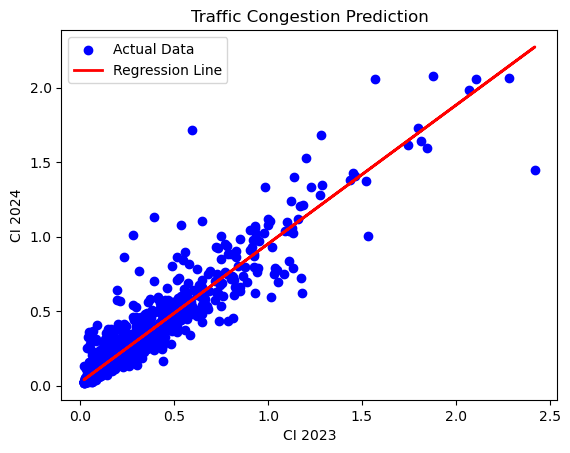

Slope: 0.9306305840139103, Intercept: 0.020764110904342048


In [88]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Load dataset
df = pd.read_csv("/Users/adityajyoti/Documents/BPTS/Congestion Data/co-lab-repo/merged_data - merged_data.csv")

# Remove NaN values
df.dropna(inplace=True)  # NaN rows ko hata do

# Compute Congestion Index (CI)
df["CI_2023"], df["CI_2024"] = df["2023"] / df["Road Width (m)"], df["2024"] / df["Road Width (m)"]

# Train Linear Regression Model
X, Y = df["CI_2023"].values.reshape(-1, 1), df["CI_2024"].values.reshape(-1, 1)
model = LinearRegression().fit(X, Y)

# Plot Results
plt.scatter(X, Y, color="blue", label="Actual Data")
plt.plot(X, model.predict(X), color="red", linewidth=2, label="Regression Line")
plt.xlabel("CI 2023"), plt.ylabel("CI 2024"), plt.title("Traffic Congestion Prediction")
plt.legend(), plt.show()

# Print Model Coefficients
print(f"Slope: {model.coef_[0][0]}, Intercept: {model.intercept_[0]}")
